In [23]:
import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
random.seed(0)

In [24]:
# loading dataset
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')
df.head(20)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
5,6,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 weeks ago,I work for door dash and they locked us all ou...,1 star
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,If I could give this location a zero on custo...,1 star
7,8,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,Came in and ordered a Large coffee w/no ice. T...,1 star
8,9,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Went thru drive thru. Ordered. Getting home no...,1 star
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4 stars


In [25]:
# convert ratingto int 
rating_map = {"1 star": 1,
              "2 stars": 2, 
              "3 stars": 3, 
              "4 stars": 4,
              "5 stars": 5
             }

df['rating'] = df['rating'].map(rating_map)
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


In [26]:
df.rename({'latitude ': 'latitude'}, axis=1, inplace=True)
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [27]:
# count of unique store_address values
df['store_address'].nunique()

40

In [28]:
# count of unique latitude and longitude values
df[['latitude', 'longitude']].nunique()

latitude     39
longitude    39
dtype: int64

In [29]:
# checking missing entries
missing_coordinates = df[df['latitude'].isnull()] 
missing_coordinates

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
22141,22142,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",3 months ago,Breakfast specials are good. The sausage burri...,4
22142,22143,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",a year ago,This isn't your typical McDonald's. This place...,5
22143,22144,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",2 weeks ago,This place was serving good quality breakfast ...,4
22144,22145,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",a month ago,I understand this is a very busy location but ...,1
22145,22146,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",2 months ago,"When I arrived at McDonald's, it was very crow...",4
...,...,...,...,...,...,...,...,...,...,...
27719,27720,ýýýMcDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",3 years ago,This McDonald's is across the street from Waik...,5
27720,27721,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,"Seems like, they always makes some mistakes wh...",2
27721,27722,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,Convenient to the east end of Kalakaua Ave. Lo...,4
27722,27723,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,"2,175",11 months ago,"Lost McDonald's in Honolulu, if you can avoid ...",1


In [30]:
# number of unique unreadible store address
missing_coordinates['store_address'].nunique()

1

In [31]:
# decipher location through reviews 
missing_coordinates['review'][27721]

'Convenient to the east end of Kalakaua Ave. Long line in the morning for breakfast. Staff friendly and they can/will deliver to your table--which is the only reason I gave it 4 stars. Complaints: homeless person racked out at one of the ï¿½'

In [32]:
# replacing all store_addresses to appriopiate address and coordinates
df.loc[df['latitude'].isnull(), 'store_address'] = '2476 Kalākaua Ave, Honolulu, HI 96815, United States'
df['latitude'] = df['latitude'].fillna(21.277479)
df['longitude'] = df['longitude'].fillna(-157.824151)

In [33]:
# verify no missing values
df.isnull().sum()

reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64

In [34]:
# count of reviews for each unique store 
df['store_address'].value_counts()

store_address
9814 International Dr, Orlando, FL 32819, United States                       1890
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States          1720
10901 Riverside Dr, North Hollywood, CA 91602, United States                  1710
1415 E State Rd, Fern Park, FL 32730, United States                           1700
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States        1650
3501 Biscayne Blvd, Miami, FL 33137, United States                            1570
621 Broadway, Newark, NJ 07104, United States                                 1290
1100 N US Hwy 377, Roanoke, TX 76262, United States                           1168
72-69 Kissena Blvd, Queens, NY 11367, United States                           1140
429 7th Ave, New York, NY 10001, United States                                1140
724 Broadway, New York, NY 10003, United States                               1140
By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United State

In [35]:
# average rating for each store
average_rating_by_store = {address:(df[df['store_address'] == address])['rating'].mean().round(2) for address in df['store_address'].unique()}
average_rating_by_store

{'13749 US-183 Hwy, Austin, TX 78750, United States': 3.19,
 '1698 US-209, Brodheadsville, PA 18322, United States': 3.46,
 '72-69 Kissena Blvd, Queens, NY 11367, United States': 3.29,
 '429 7th Ave, New York, NY 10001, United States': 3.69,
 '724 Broadway, New York, NY 10003, United States': 3.31,
 '160 Broadway, New York, NY 10038, United States': 2.33,
 '555 13th St NW, Washington, DC 20004, United States': 2.67,
 '10451 Santa Monica Blvd, Los Angeles, CA 90025, United States': 3.67,
 '114 Delancey St, New York, NY 10002, United States': 3.33,
 '5920 Balboa Ave, San Diego, CA 92111, United States': 3.6,
 '262 Canal St, New York, NY 10013, United States': 3.13,
 '490 8th Ave, New York, NY 10001, United States': 2.96,
 '550 Lawrence Expy, Sunnyvale, CA 94086, United States': 3.33,
 '11382 US-441, Orlando, FL 32837, United States': 3.16,
 '210 5th S, Salt Lake City, UT 84106, United States': 2.53,
 '1916 M St NW, Washington, DC 20036, United States': 3.6,
 "151 West 34th Street (Macy's

C:\Users\julia\AppData\Local\Temp\ipykernel_33824\1735637471.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\julia\AppData\Local\Temp\ipykernel_33824\1735637471.py:20: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([sc], ['Average Rating'])


<Figure size 1200x800 with 0 Axes>

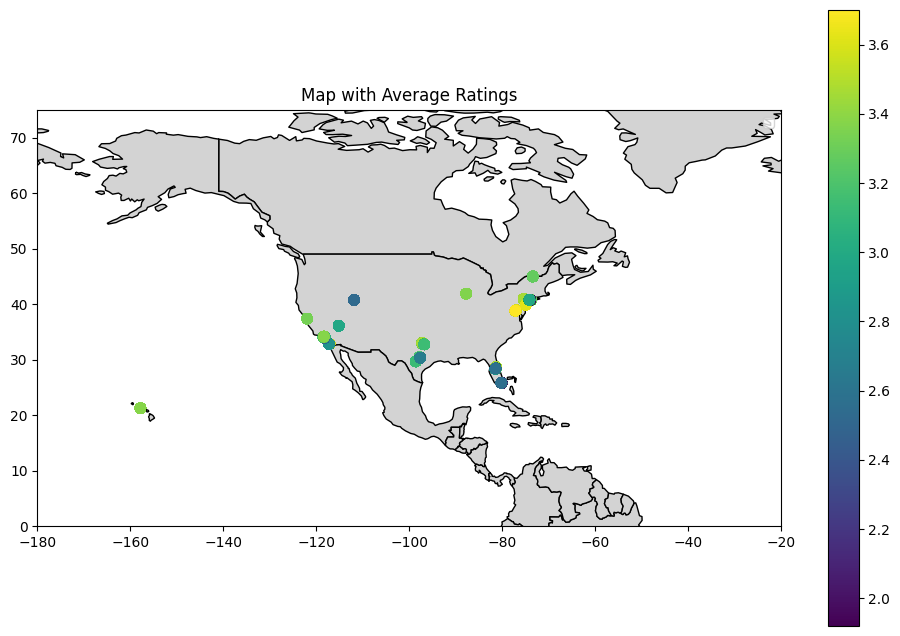

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

average_rating_by_store = {address: (df[df['store_address'] == address])['rating'].mean().round(2) for address in df['store_address'].unique()}

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Assigning average ratings to the GeoDataFrame based on store address
gdf['average_rating'] = gdf['store_address'].map(average_rating_by_store)

# Plotting the map
plt.figure(figsize=(12, 8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(12, 8))

sc = gdf.plot(ax=ax, column='average_rating', cmap='viridis', markersize=50, legend=True)
plt.legend([sc], ['Average Rating'])
plt.title('Map with Average Ratings')

# focus on a specific area
plt.xlim(-180, -20)  # Example longitude limits
plt.ylim(0, 75)  # Example latitude limits

plt.show()


In [37]:
%store average_rating_by_store

Stored 'average_rating_by_store' (dict)


C:\Users\julia\AppData\Local\Temp\ipykernel_33824\3083500117.py:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\julia\AppData\Local\Temp\ipykernel_33824\3083500117.py:30: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([sc], ['Average Rating'])


<Figure size 1200x800 with 0 Axes>

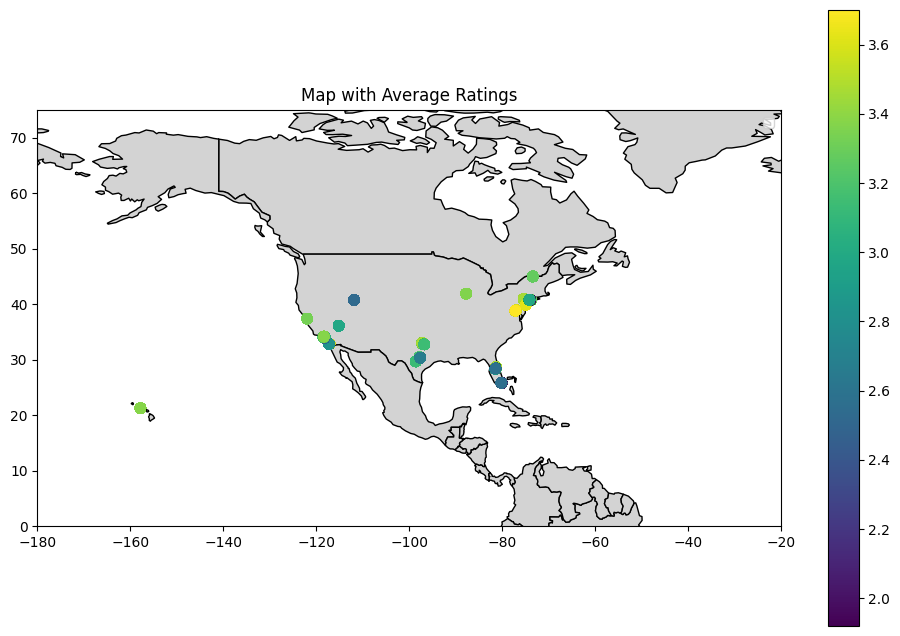

CPU Time: 5.140506029129028 seconds
I/O Cost: 3412992 bytes


In [38]:
import time
import psutil

# Start CPU time measurement
start_time = time.time()

# Measure I/O cost
io_before = psutil.disk_io_counters()

# Your geospatial analysis code here
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

average_rating_by_store = {address: (df[df['store_address'] == address])['rating'].mean().round(2) for address in df['store_address'].unique()}

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Assigning average ratings to the GeoDataFrame based on store address
gdf['average_rating'] = gdf['store_address'].map(average_rating_by_store)

# Plotting the map
plt.figure(figsize=(12, 8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', edgecolor='black', figsize=(12, 8))

sc = gdf.plot(ax=ax, column='average_rating', cmap='viridis', markersize=50, legend=True)
plt.legend([sc], ['Average Rating'])
plt.title('Map with Average Ratings')

# focus on a specific area
plt.xlim(-180, -20)  # Example longitude limits
plt.ylim(0, 75)  # Example latitude limits

plt.show()

# End CPU time measurement
end_time = time.time()

# Calculate CPU time
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time} seconds")

# Measure I/O cost
io_after = psutil.disk_io_counters()

# Calculate I/O cost
io_cost = io_after.read_bytes - io_before.read_bytes + io_after.write_bytes - io_before.write_bytes
print(f"I/O Cost: {io_cost} bytes")
